In [19]:
!pip install seaborn-qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn_qqplot as sqq

from matplotlib import pyplot as plt

0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [5]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Каждый график необходимо снабдить комментарием

1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

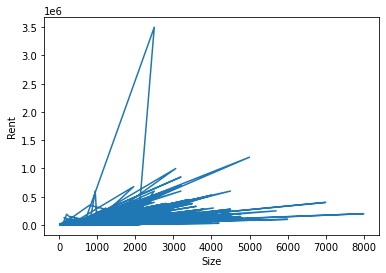

In [4]:
#график показывает цену аренды относительно ее размера
fig1 = plt.figure()
plt.plot(df['Size'], df['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

In [33]:
max(df['Bathroom'])

10

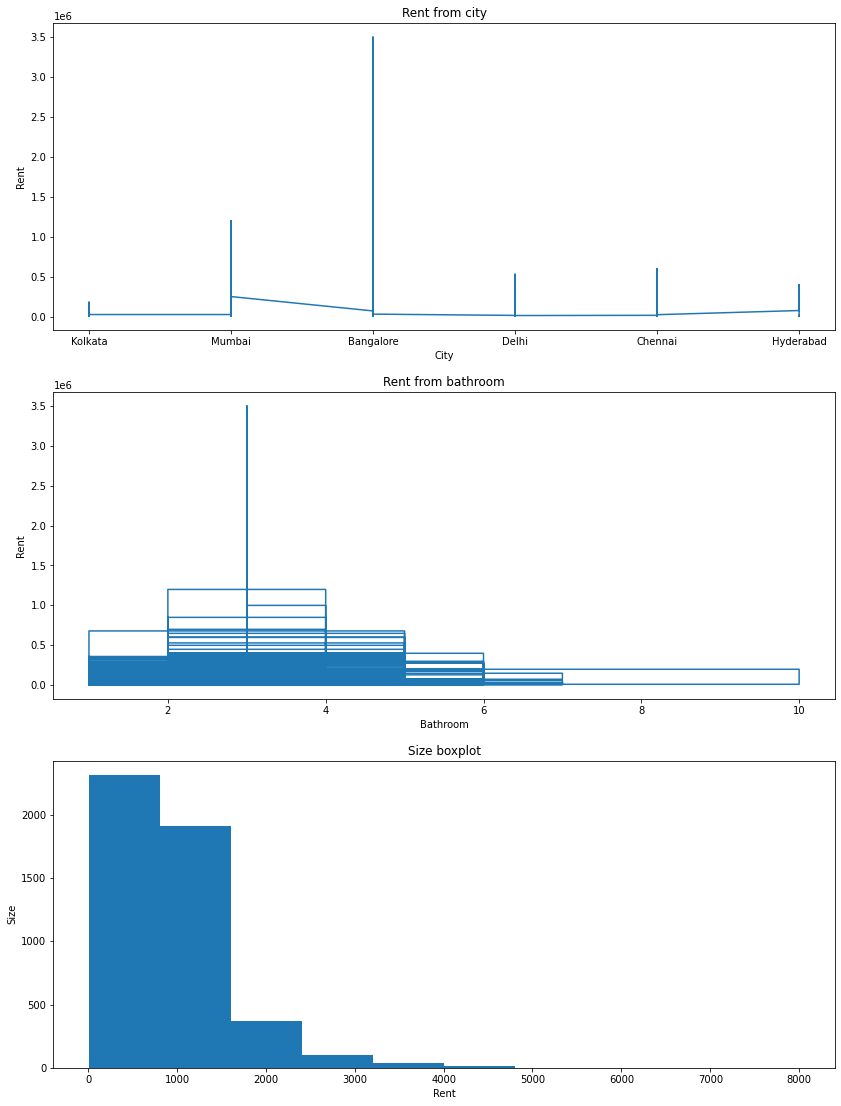

In [37]:
fig2 = plt.figure(2, figsize=[14, 26])

#график зависимости цены сдачи от Города
ax1 = plt.subplot(4, 1, 1)
ax1 = plt.plot(df['City'], df['Rent'])
ax1 = plt.title('Rent from city')
ax1 = plt.xlabel('City')
ax1 = plt.ylabel('Rent')

#график зависимости цены закрытия от числа ванн
ax2 = plt.subplot(4, 1, 2)
ax2 = plt.step(df['Bathroom'], df['Rent'])
ax2 = plt.title('Rent from bathroom')
ax2 = plt.xlabel('Bathroom')
ax2 = plt.ylabel('Rent')

#график зависимости цены от размера
ax3 = plt.subplot(4, 1, 3)
ax3 = plt.hist(df['Size'])
ax3 = plt.title('Size boxplot')
ax3 = plt.xlabel('Rent')
ax3 = plt.ylabel('Size')

plt.show()

2 На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



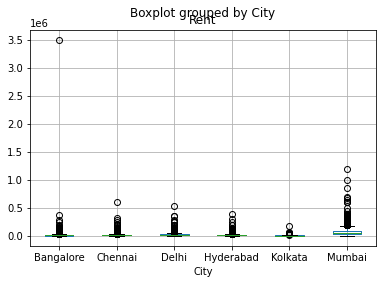

In [38]:
df.boxplot('Rent', by='City')

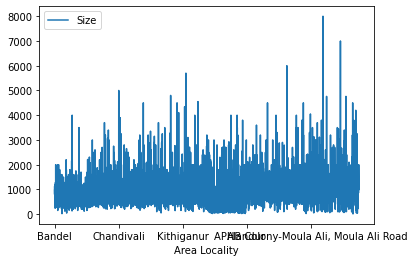

In [40]:
df.plot('Area Locality', 'Size')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9ef401fd0>]],
      dtype=object)

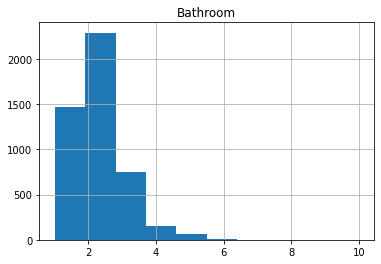

In [41]:
df.hist('Bathroom')

3 Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

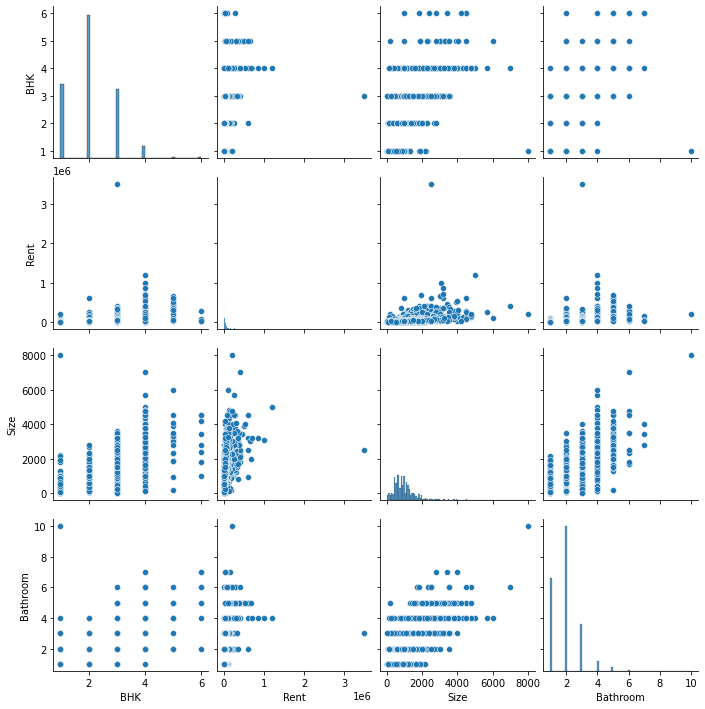

In [23]:
#3.1
sns.pairplot(df)

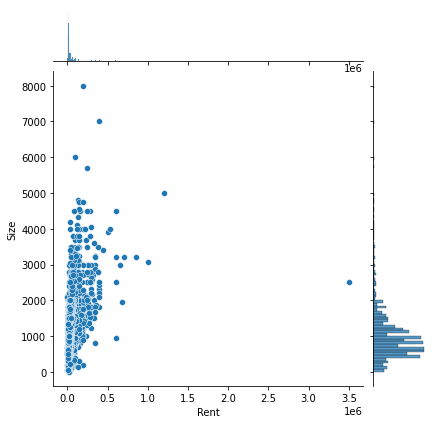

In [24]:
#3.2
sns.jointplot(x='Rent', y='Size', data=df)

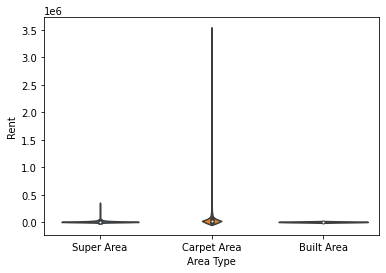

In [25]:
#3.3
sns.violinplot(x=df['Area Type'], y=df['Rent'])

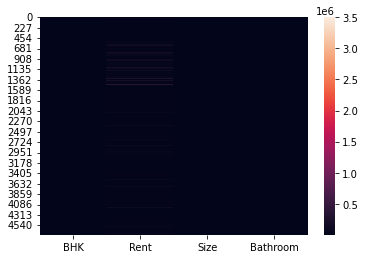

In [26]:
#3.4
sns.heatmap(df[["BHK", "Rent", 'Size', 'Bathroom']])

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

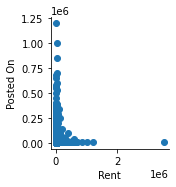

In [22]:
sqq.pplot(df, x='Rent', y='Posted On')

5 Построить любой график (связанный с вашими данными) с помощью plotly

In [13]:
import plotly.express as px
fig = px.bar(df[['Size', 'Posted On']], x='Posted On', y='Size')
fig.show()